In [151]:
import networkx as nx
from numpy.linalg import matrix_power
import numpy as np

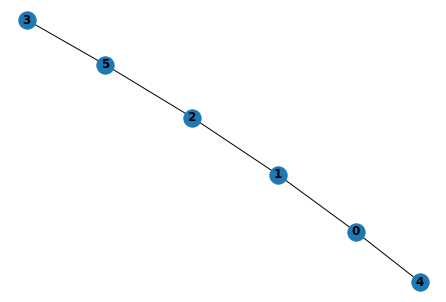

In [152]:
g = nx.random_tree(6)
nx.draw(g, with_labels=True, font_weight='bold')
A = nx.adjacency_matrix(g)

In [123]:
print(A.todense())

[[0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 1 1]
 [1 0 1 0 0 0]
 [0 1 1 0 0 0]
 [0 0 1 0 0 0]]


In [166]:
from numpy.linalg import matrix_power
import numpy as np

def matrix_B(A,k):    # compute B = A + A^2 + A^3 + ... + A^k
    #A = A.todense()
    print(type(A))
    n = A.shape[0]
    B = np.zeros(A.shape)   # B is a 2D array
    for i in range(k):
        B += matrix_power(A,k+1)
    for i in range(n):
        for j in range(n):
            if B[i][j] > 0:
                B[i][j] = 1
    return B

def max_row(B):    # return the row with max sum
    num = 0
    maxrow = 0
    for i in range(B.shape[0]):
        if np.sum(B[i]) > num:
            num = np.sum(B[i])
            maxrow = i
    return maxrow

In [165]:
B = matrix_B(A,3)
print(B)

<class 'numpy.matrix'>
[[1. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 1. 1.]
 [1. 0. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 1. 1.]]


In [77]:
MaxRow(B)

0

In [157]:
def leaves(A):
    n = A.shape[0]
    start = []
    for i in range(n):
        if np.sum(A[i]) == 1:
            start.append(i)
    return start

def pendant_path(A,i):
    n = A.shape[0]
    length = 0        # record length
    leave = i         
    while True:
        if i == leave:
            for j in range(n):
                if A[i,j] == 1:
                    i_last = i
                    i = j
                    length +=1
                    break
        elif np.sum(A[i]) == 2 and A[i,i_last] == 1.0:
            for j in range(n):
                if A[i,j] == 1 and j != i_last:
                    i_last = i
                    i = j
                    length +=1
                    break
        else:
            break
    return length

def max_pendant_path(A,start):
    num = 0
    for leave in start:
        length = pendant_path(A,leave)
        if length > num:
            num = length        
    return num
                
    

In [160]:
#A = A.todense()
print(type(A))
start = leaves(A)
print(A)
max_pendant_path(A,start)

<class 'numpy.matrix'>
[[0 1 0 0 1 0]
 [1 0 1 0 0 0]
 [0 1 0 0 0 1]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 1 1 0 0]]
3


5